In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cassandrautils import *


In [2]:
tweets = getTwitterDF()
weather = getWeatherDF()

tweets['Tweet timestamp'] = pd.to_datetime(tweets['tweet_date'], format="%d-%m-%Y %H:%M")
weather['forecast_timestamp'] = pd.to_datetime(weather['forecastdate'], format="%d-%m-%Y %H:%M")
print("Tweets from ", tweets['Tweet timestamp'].min(), " To ", tweets['Tweet timestamp'].max())
print("Weather from ", weather['forecast_timestamp'].min(), " To ", weather['forecast_timestamp'].max())

Tweets from  2021-06-05 05:03:16  To  2021-06-05 05:50:12
Weather from  2021-06-05 05:01:07  To  2021-06-05 05:46:12


In [10]:
tweets

,location,tweet_date,classification,tweet,Tweet timestamp,Tweet timestamp 10mins
0,MetroVancouver,2021-06-05 05:03:16,Negative,@jackermann @RobertPlant @AlisonKrauss @JimmyP...,2021-06-05 05:03:16,2021-06-05 05:30:00
1,MetroVancouver,2021-06-05 05:04:09,Positive,@NianticHelp Thanks for your help. It\u2019s w...,2021-06-05 05:04:09,2021-06-05 05:30:00
2,MetroVancouver,2021-06-05 05:04:20,Positive,Just posted a photo @ Trash Central https://t....,2021-06-05 05:04:20,2021-06-05 05:30:00
3,MetroVancouver,2021-06-05 05:04:41,Negative,@OhioSQ I will have to do some Googling,2021-06-05 05:04:41,2021-06-05 05:30:00
4,MetroVancouver,2021-06-05 05:05:22,Positive,Through an extensive review of the literature ...,2021-06-05 05:05:22,2021-06-05 05:30:00
...,...,...,...,...,...,...
99,MetroVancouver,2021-06-05 05:48:43,Positive,@toddnickel Glad you\u2019re here. Happy Birth...,2021-06-05 05:48:43,2021-06-05 06:00:00
100,MetroVancouver,2021-06-05 05:48:49,Positive,"Today, I took the first step towards securing ...",2021-06-05 05:48:49,2021-06-05 06:00:00
101,MetroVancouver,2021-06-05 05:49:27,Positive,"Luke gets his own bedroom, he is soooo spoiled...",2021-06-05 05:49:27,2021-06-05 06:00:00
102,MetroVancouver,2021-06-05 05:49:48,Negative,"@sarahberms Every time I release a new video, ...",2021-06-05 05:49:48,2021-06-05 06:00:00


In [11]:
weather

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,forecast_timestamp
0,Vancouver,2021-06-05 05:01:07,overcast clouds,285.739990,87.0,1014.0,1622808588,1622866336,286.119995,288.750000,284.609985,0.45,2021-06-05 05:01:07
1,Vancouver,2021-06-05 05:06:08,overcast clouds,285.739990,87.0,1014.0,1622808588,1622866336,286.119995,288.750000,284.609985,0.45,2021-06-05 05:06:08
2,Vancouver,2021-06-05 05:11:08,overcast clouds,285.510010,87.0,1014.0,1622808588,1622866336,285.910004,288.070007,284.390015,0.89,2021-06-05 05:11:08
3,Vancouver,2021-06-05 05:16:09,overcast clouds,285.510010,87.0,1014.0,1622808588,1622866336,285.910004,288.070007,284.390015,0.89,2021-06-05 05:16:09
4,Vancouver,2021-06-05 05:21:09,overcast clouds,285.390015,88.0,1014.0,1622808588,1622866336,285.769989,288.279999,284.119995,0.45,2021-06-05 05:21:09
5,Vancouver,2021-06-05 05:26:09,overcast clouds,285.390015,88.0,1014.0,1622808588,1622866336,285.769989,288.279999,284.119995,0.45,2021-06-05 05:26:09
6,Vancouver,2021-06-05 05:31:11,overcast clouds,285.350006,88.0,1014.0,1622808588,1622866336,285.739990,288.100006,284.119995,0.89,2021-06-05 05:31:11
7,Vancouver,2021-06-05 05:36:12,overcast clouds,285.350006,88.0,1014.0,1622808588,1622866336,285.739990,288.100006,284.119995,0.89,2021-06-05 05:36:12
8,Vancouver,2021-06-05 05:41:12,overcast clouds,285.290009,88.0,1013.0,1622808588,1622866336,285.679993,288.100006,284.119995,0.89,2021-06-05 05:41:12
9,Vancouver,2021-06-05 05:46:12,overcast clouds,285.290009,88.0,1013.0,1622808588,1622866336,285.679993,288.100006,284.119995,0.89,2021-06-05 05:46:12


In [3]:
ns10min = 30*60*1000000000   # 30 minutes in nanoseconds 
tweets['Tweet timestamp 10mins'] = pd.to_datetime(((tweets['Tweet timestamp'].astype(np.int64) // ns10min + 1 ) * ns10min))
tweets['Tweet timestamp 10mins'] = pd.to_datetime(tweets['Tweet timestamp 10mins'], format="%d-%m-%Y %H:%M")

Text(0.5, 1.0, 'Total weather data recorded')

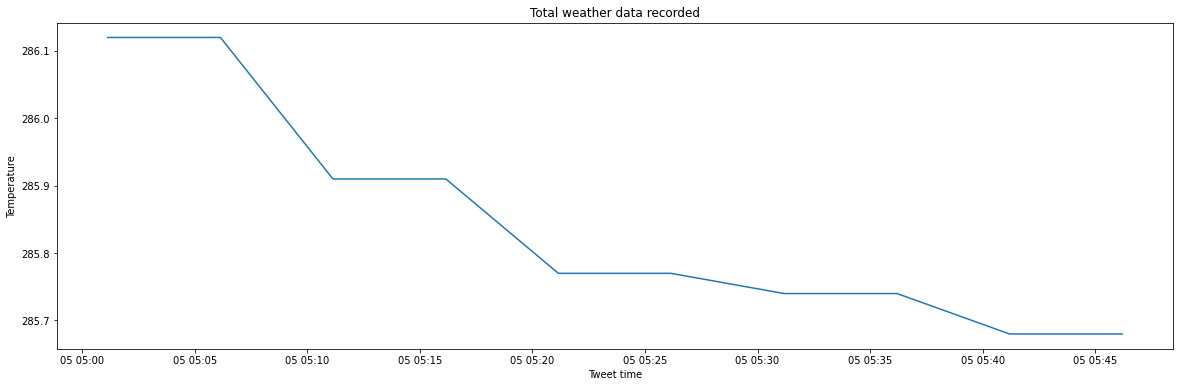

In [4]:
plt.figure(figsize=(20,6))
plt.plot(weather['forecast_timestamp'], weather['temp'])
plt.xlabel("Tweet time")
plt.ylabel("Temperature")
plt.title("Total weather data recorded")

Text(0.5, 1.0, 'Weather data within tweet window')

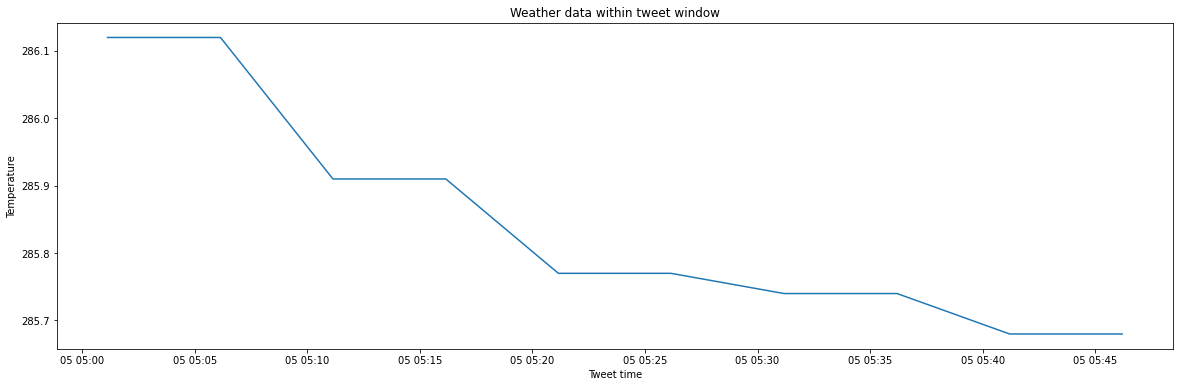

In [5]:
ww = weather[(weather['forecast_timestamp'] <= tweets['Tweet timestamp'].max())]
plt.figure(figsize=(20,6))
plt.plot(ww['forecast_timestamp'], ww['temp'])
plt.xlabel("Tweet time")
plt.ylabel("Temperature")
plt.title("Weather data within tweet window")

Text(0, 0.5, 'Feels like Temperature in (Kelvin)')

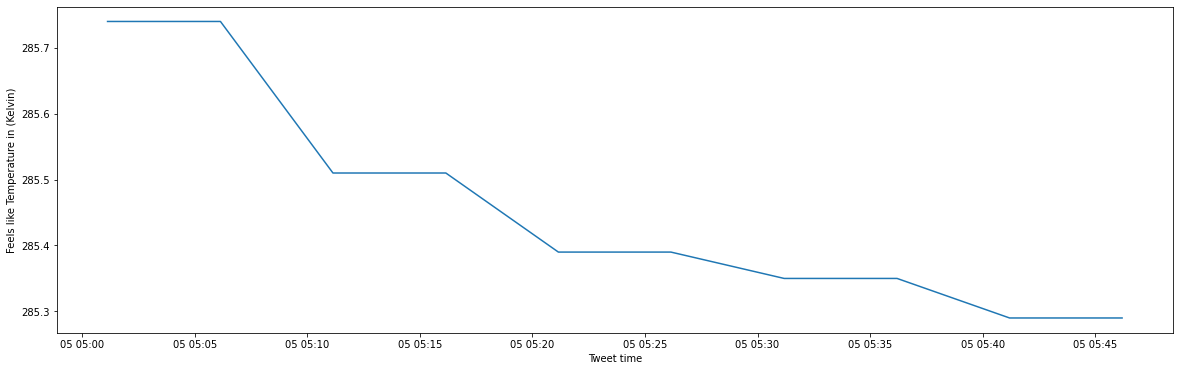

In [6]:
plt.figure(figsize=(20,6))
plt.plot(ww['forecast_timestamp'], ww['feels_like'])
plt.xlabel("Tweet time")
plt.ylabel("Feels like Temperature in (Kelvin)")

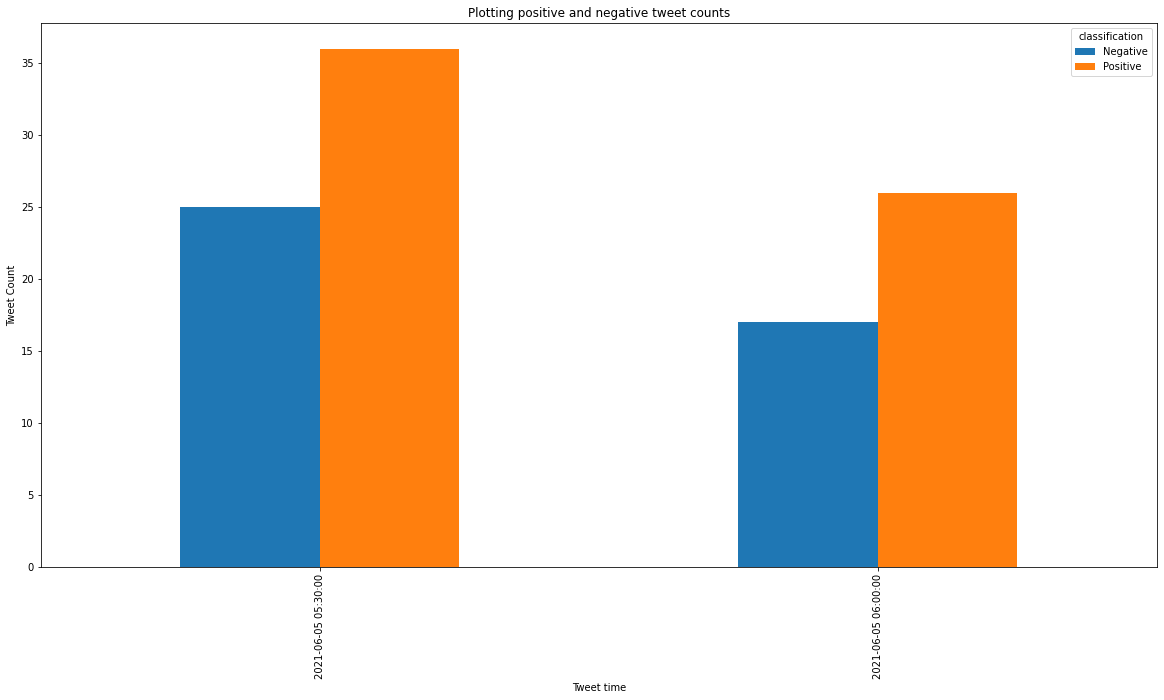

In [7]:
value_counts = tweets.groupby(['Tweet timestamp 10mins'])['classification'].value_counts().rename_axis(['Tweet timestamp', 'classification']).reset_index(name='counts')
#value_counts.index.names = ['test', 'check']

value_counts.pivot("Tweet timestamp", "classification", "counts").plot(kind='bar', figsize=(20,10))
plt.xlabel("Tweet time")
plt.ylabel("Tweet Count")
plt.title("Plotting positive and negative tweet counts")
plt.show()


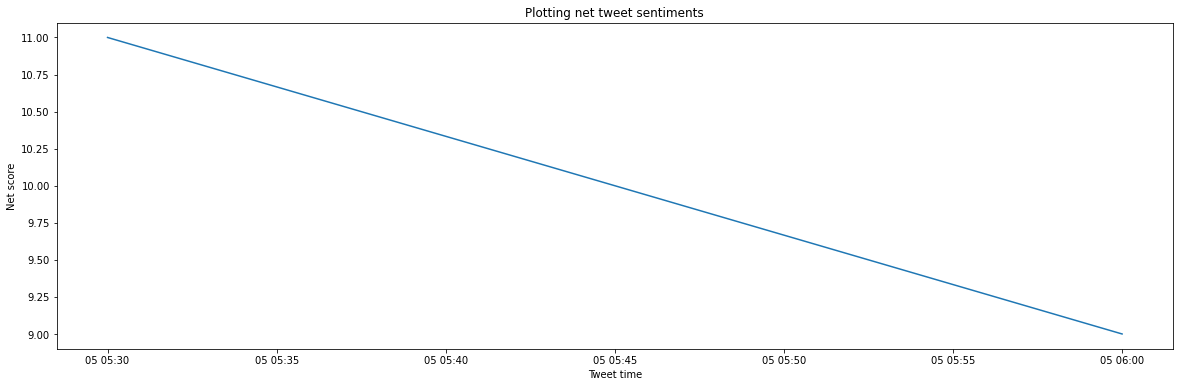

In [8]:
def scoring(senti, c_val):
    if senti == "Positive":
        return c_val
    return c_val*(-1)


value_counts['adjusted'] = value_counts.apply(lambda x: scoring(x["classification"], x["counts"]), axis=1)
trend = value_counts.groupby(['Tweet timestamp'], as_index=False).agg({'adjusted' : "sum"})
plt.figure(figsize=(20,6))
plt.xlabel("Tweet time")
plt.ylabel("Net score")
plt.title("Plotting net tweet sentiments")
plt.plot(trend['Tweet timestamp'], trend['adjusted'])

Text(0.5, 1.0, "Plotting 'Feels like' temperature")

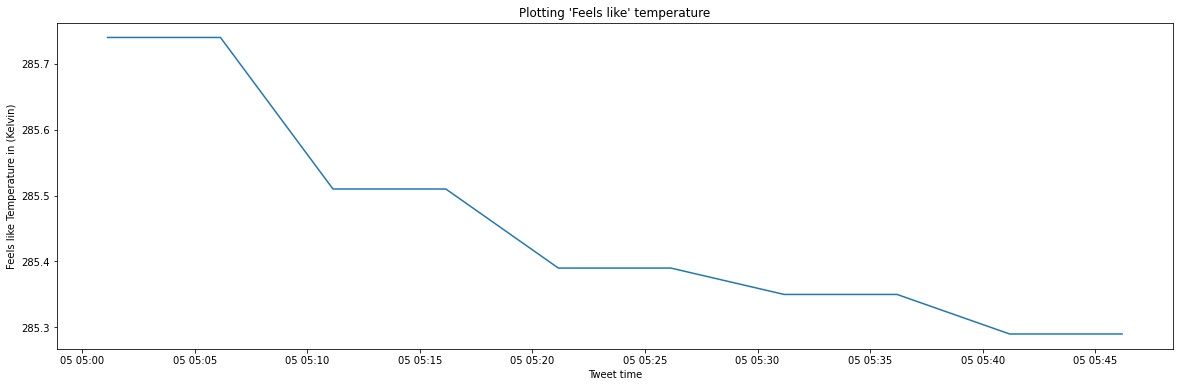

In [9]:
plt.figure(figsize=(20,6))
plt.plot(ww['forecast_timestamp'], ww['feels_like'])
plt.xlabel("Tweet time")
plt.ylabel("Feels like Temperature in (Kelvin)")
plt.title("Plotting 'Feels like' temperature")